# Intro-to-Astro Week 3
## NASA Exoplanet Archive Assignment

This week, we learned about exoplanet detection methods and explored the NASA Exoplanet Archive together. In this assignment, you will practice using Exoplanet Archive by downloading data and creating some informative plots.

### Part 1: Finding your data
Launch the NASA Exoplanet Archive at [this link](https://exoplanetarchive.ipac.caltech.edu/). Before we get into data manipulation with Python, let's check out some of the utility of the online portal. Navigate to the "Planetary Systems Composite Data" table.

List the first 3 authors who discovered TOI-6324 b:
- first
- second
- third


### Part 1 Answer:
* Lee, Rena A.
* Dai, Fei search
* Howard, Andrew W.

How many systems list position information (RA, Dec) from sources that are not the TICv8 (TESS Input Catalog)?
- answer

Explore one of these position reference papers. What was the purpose of their survey?
- list the paper and your answer


*Hints: Play around with the different columns of data available under 'Select Columns'. You can type in the column headers to search for specific values in the table.*

### Answer
Article Information Title: BANYAN. VI. Discovery of a Companion at the Brown Dwarf/Planet-Mass Limit to a Tucana–Horologium M Dwarf

The purpose of this paper is to report the discovery of a substellar companion to a young M6 star (2MASS J02192210–3925225) that is a member of the Tucana–Horologium association.

Authors:

Étienne Artigau Jonathan Gagné Jacqueline Faherty Lison Malo Marie-Eve Naud René Doyon David Lafrenière Yuri Beletsky

Now that we have poked around online, let's download the data and plot it. Reset the table by refreshing the page, so your filters and selections are removed. Select "Download Table" and save to your data directory. This CSV file holds information on all the currently confirmed exoplanets. Follow the code prompts below to read in this data file.

In [4]:
# To start, let's import the necessary libraries for this assignment.

import os                           # for file and directory operations
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for plotting data
import numpy as np                  # for numerical operations

# to display plots inline in Jupyter Notebook, use this 'magic command':
%matplotlib inline

In [5]:
# Locate the data file you downloaded from the NASA Exoplanet Archive and read it into a DataFrame

dir = ''  # replace with your actual data directory
file = 'PSCompPars_2025.07.22_06.04.37.csv' # replace with your actual data file name
path = os.path.join(dir, file)

# Read the CSV file into a DataFrame
df = pd.read_csv(path, comment='#')
df # let's see what our data table looks like

,pl_name,hostname,gaia_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,rv_flag,tran_flag,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,Gaia DR2 3946945413106333696,2,1,Radial Velocity,2007,Xinglong Station,1,0,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,Gaia DR2 1696798367260229376,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,1,0,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,Gaia DR2 1920113512486282240,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,1,0,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,Gaia DR2 1385293808145621504,1,2,Radial Velocity,2002,W. M. Keck Observatory,1,0,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,Gaia DR2 2135550755683407232,3,1,Radial Velocity,1996,Multiple Observatories,1,0,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,ups And b,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1996,Lick Observatory,1,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5929,ups And c,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1999,Multiple Observatories,1,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5930,ups And d,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1999,Multiple Observatories,1,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5931,ups Leo b,ups Leo,Gaia DR2 3794167001116433152,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,1,0,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [6]:
df.head()

,pl_name,hostname,gaia_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,rv_flag,tran_flag,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,Gaia DR2 3946945413106333696,2,1,Radial Velocity,2007,Xinglong Station,1,0,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,Gaia DR2 1696798367260229376,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,1,0,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,Gaia DR2 1920113512486282240,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,1,0,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,Gaia DR2 1385293808145621504,1,2,Radial Velocity,2002,W. M. Keck Observatory,1,0,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,Gaia DR2 2135550755683407232,3,1,Radial Velocity,1996,Multiple Observatories,1,0,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [7]:
df.shape

(5933, 89)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5933 entries, 0 to 5932
Data columns (total 89 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5933 non-null   object 
 1   hostname         5933 non-null   object 
 2   gaia_id          5622 non-null   object 
 3   sy_snum          5933 non-null   int64  
 4   sy_pnum          5933 non-null   int64  
 5   discoverymethod  5933 non-null   object 
 6   disc_year        5933 non-null   int64  
 7   disc_facility    5933 non-null   object 
 8   rv_flag          5933 non-null   int64  
 9   tran_flag        5933 non-null   int64  
 10  micro_flag       5933 non-null   int64  
 11  etv_flag         5933 non-null   int64  
 12  pl_controv_flag  5933 non-null   int64  
 13  pl_orbper        5636 non-null   float64
 14  pl_orbpererr1    5140 non-null   float64
 15  pl_orbpererr2    5140 non-null   float64
 16  pl_orbperlim     5636 non-null   float64
 17  pl_orbsmax    

In [9]:
# Let's see what columns are available in the DataFrame
print(df.columns) # Note: descriptions of the columns can be found in the beginning of the CSV file

Index(['pl_name', 'hostname', 'gaia_id', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'rv_flag', 'tran_flag',
       'micro_flag', 'etv_flag', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_ma

In the following code cells, create and print variables that will provide some information about our data table, such as the number of planets in the table, the discovery facilities, etc.

In [10]:
# How many planets are in the table?
# code here

In [11]:
df['pl_name'].value_counts()

,count
pl_name,
xi Aql b,1
11 Com b,1
11 UMi b,1
14 And b,1
14 Her b,1
...,...
2MASS J04414489+2301513 b,1
2MASS J03590986+2009361 b,1
2MASS J0249-0557 c,1


In [12]:
# How many discovery facilities are listed in the table?
# code here

In [13]:
df['disc_facility'].value_counts()

,count
disc_facility,
Kepler,2784
Transiting Exoplanet Survey Satellite (TESS),643
K2,547
Multiple Observatories,328
La Silla Observatory,293
...,...
Leoncito Astronomical Complex,1
Teide Observatory,1
Infrared Survey Facility,1


### Part 2: Plotting your data

Now that we have taken a look at the data table, let's start using it! We can recreate one of the plots we looked at together on Exoplanet Archive as a quick example.

Text(0, 0.5, 'Mass (Jupiter Masses)')

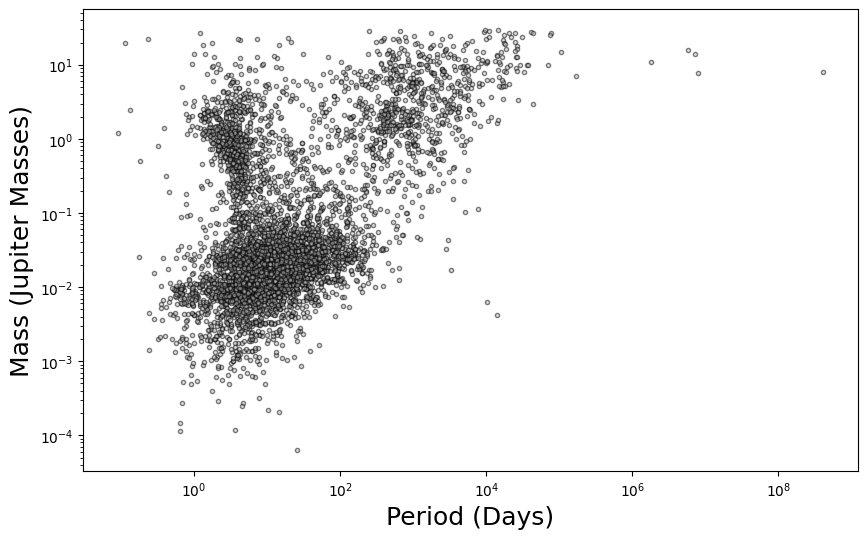

In [14]:
# create a scatter plot of Period (Days) vs Mass (Jupiter Masses)

# create a figure object and set its size
plt.figure(figsize=(10, 6))

# plot the relevant columns from the DataFrame.
# You can adjust different parameters like alpha (transparency), color, edgecolor, marker, etc.
plt.scatter(df['pl_orbper'], df['pl_bmassj'], alpha=0.5, color='silver', edgecolor='k', marker='.')

# set the x and y scales to logarithmic so that we can see the data better
plt.xscale('log')
plt.yscale('log')

# label your axes
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)


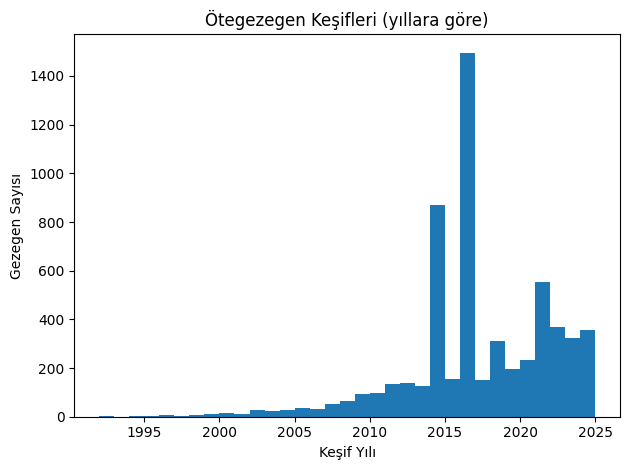

In [15]:
(
    df["disc_year"]
    .dropna()
    .astype(int)
    .plot(kind="hist", bins=range(df["disc_year"].min(),
                                  df["disc_year"].max() + 1, 1))
)
plt.xlabel("Keşif Yılı")
plt.ylabel("Gezegen Sayısı")
plt.title("Ötegezegen Keşifleri (yıllara göre)")
plt.tight_layout()
plt.show()

The above plot shows us the distribution of planet masses and periods like the one on Exoplanet Archive. However, we can take it a step further and distinguish the points according to their discovery method, like the plot online.

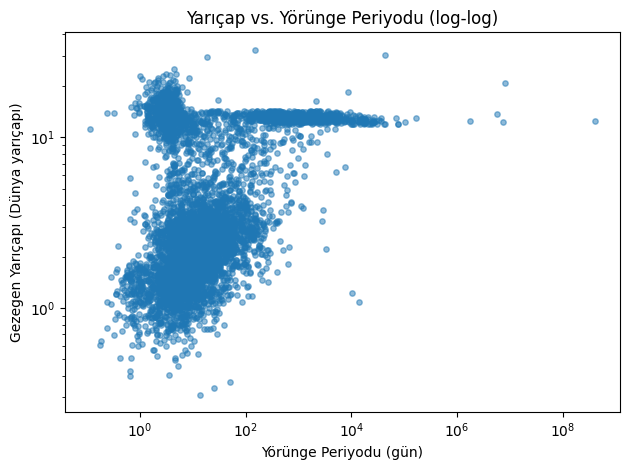

In [16]:
mask = df["pl_rade"].notna() & df["pl_orbper"].notna()

plt.figure()
plt.scatter(df.loc[mask, "pl_orbper"],
            df.loc[mask, "pl_rade"],
            marker="o", alpha=0.5, s=15)  # s ile nokta boyutu
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Yörünge Periyodu (gün)")
plt.ylabel("Gezegen Yarıçapı (Dünya yarıçapı)")
plt.title("Yarıçap vs. Yörünge Periyodu (log‑log)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-897797768.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis", len(methods))        # Yeterli renk üret
/tmp/ipython-input-17-897797768.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


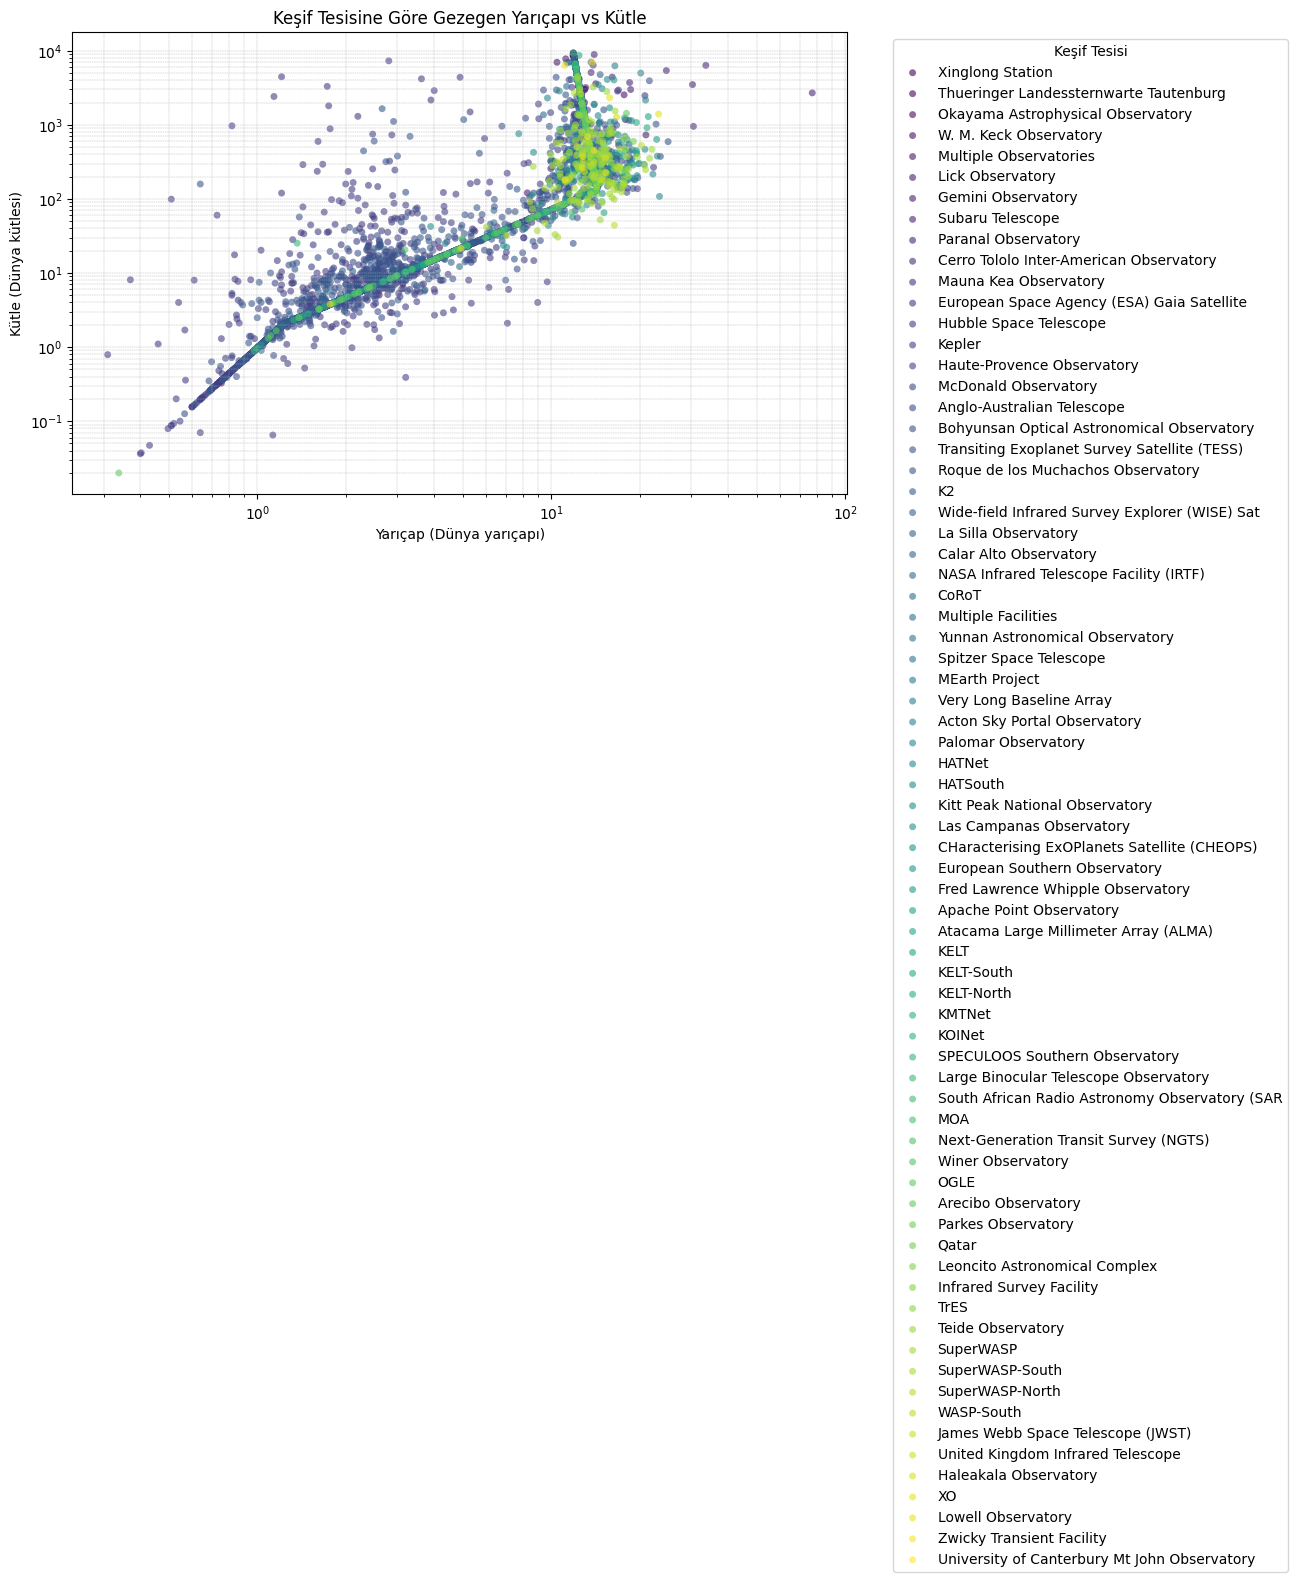

In [17]:
methods = df["disc_facility"].unique()
cmap = plt.cm.get_cmap("viridis", len(methods))        # Yeterli renk üret

# ───────────────────────────────
# 3) Saçılım grafiği (log‑log)
# ───────────────────────────────
plt.figure(figsize=(10, 6))

for idx, m in enumerate(methods):
    subset = df[df["disc_facility"] == m]
    plt.scatter(subset["pl_rade"], subset["pl_bmasse"],
                color=cmap(idx), label=m,
                alpha=0.6, s=25, edgecolors="none")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Yarıçap (Dünya yarıçapı)")
plt.ylabel("Kütle (Dünya kütlesi)")
plt.title("Keşif Tesisine Göre Gezegen Yarıçapı vs Kütle")
plt.grid(True, which="both", ls="--", lw=0.3)
plt.legend(title="Keşif Tesisi", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-633246314.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(methods))  # İstediğiniz cmap'i seçebilirsiniz


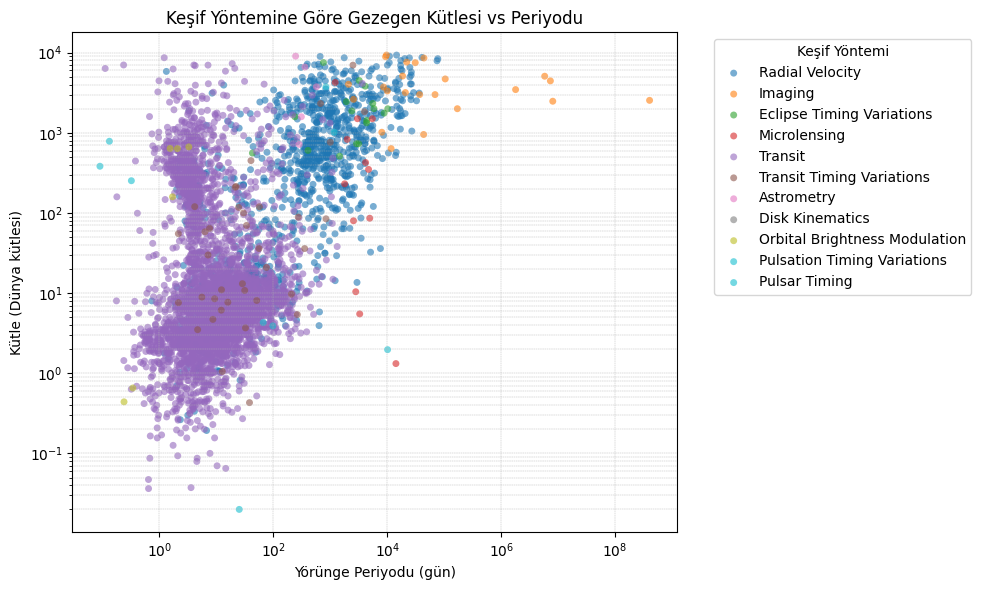

In [18]:
mask = (
    df["pl_bmasse"].notna() &          # Kütle (Dünya kütlesi)
    df["pl_orbper"].notna() &          # Yörünge periyodu (gün)
    df["discoverymethod"].notna()      # Keşif yöntemi (Transit, RV vb.)
)
df2 = df.loc[mask, ["pl_bmasse", "pl_orbper", "discoverymethod"]]

# 3) Renk haritası
methods = df["discoverymethod"].unique()
cmap = plt.cm.get_cmap("tab10", len(methods))  # İstediğiniz cmap'i seçebilirsiniz

# 4) Saçılım grafiği
plt.figure(figsize=(10, 6))
for i, m in enumerate(methods):
    subset = df[df["discoverymethod"] == m]
    plt.scatter(subset["pl_orbper"], subset["pl_bmasse"],
                label=m, alpha=0.6, s=25,
                color=cmap(i), edgecolors="none")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Yörünge Periyodu (gün)")
plt.ylabel("Kütle (Dünya kütlesi)")
plt.title("Keşif Yöntemine Göre Gezegen Kütlesi vs Periyodu")
plt.grid(True, which="both", ls="--", lw=0.3)
plt.legend(title="Keşif Yöntemi", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [19]:
print(df.columns)

Index(['pl_name', 'hostname', 'gaia_id', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'rv_flag', 'tran_flag',
       'micro_flag', 'etv_flag', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_ma

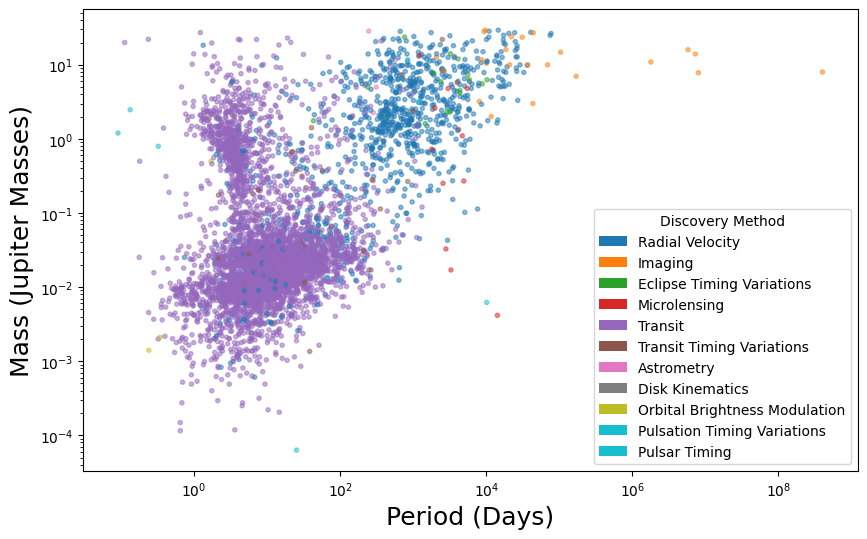

In [20]:
from matplotlib.patches import Patch
# Taking the same setup as above, but now we will color the points by discovery method
# Create the plot
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)

# Convert discovery methods to numeric codes for coloring
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# Use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10  # Choose a colormap
colors = cmap(dm_num / dm_num.max())  # Normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c=colors, alpha=0.5, marker='.')  # Plot data

# Add a legend to indicate which color corresponds to which discovery method
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')

# Show the plot
plt.show()  # Display the plot

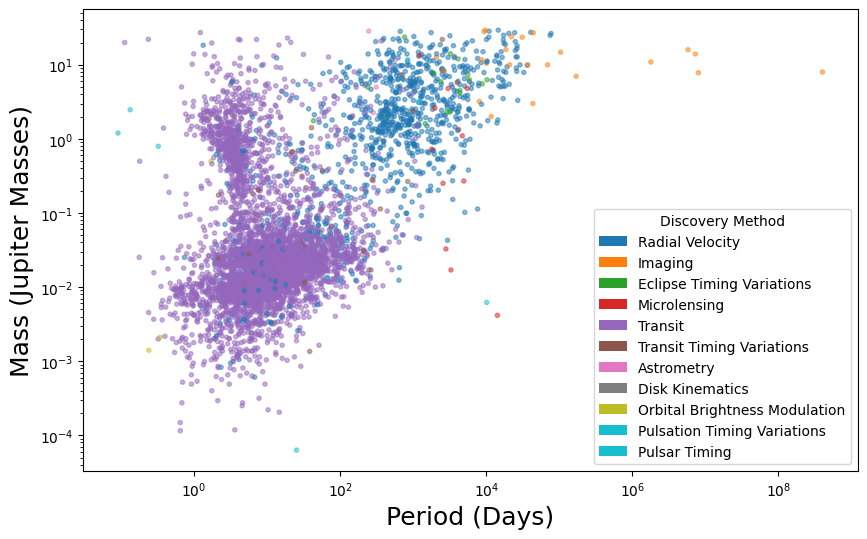

In [21]:
# Taking the same setup as above, but now we will color the points by discovery method
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10 # choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c=colors, alpha=0.5, marker='.') #plot data

# add a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')

Now that you've seen an example, recreate another plot that was already generated on the NASA Exoplanet archive.

In [22]:
# code here

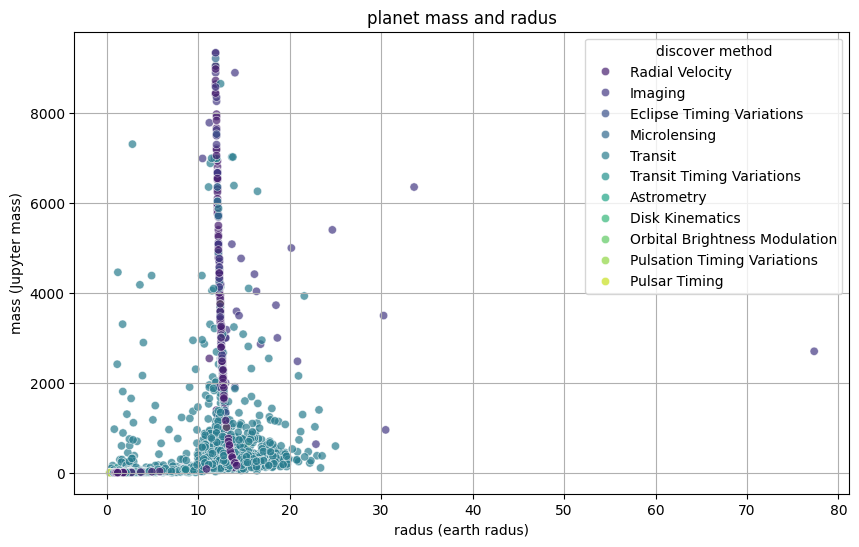

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pl_rade', y='pl_bmasse', hue='discoverymethod', palette='viridis', alpha=0.7)

# labels
plt.title('planet mass and radus')
plt.xlabel('radus (earth radus)')
plt.ylabel('mass (Jupyter mass)')

# Legend and grid
plt.legend(title='discover method')
plt.grid(True)
plt.show()

### Part 3: Filtering your data

We saw during the live session that we can filter the data table to include only a subset of planets that we're particularly interested in. Since we downloaded all systems already, we can also filter them here. Let's explore the different kinds of planets that have been discovered by TESS and Kepler, the two main transiting planet missions.

In [42]:
# create Boolean masks to filter the DataFrame for planets discovered by TESS and by Kepler
tess_mask = df['disc_facility'].str.contains('TESS', case=False, na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', case=False, na=False)

# filter the DataFrame using the masks
tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

# How many planets were discovered by TESS and Kepler?
# code here
number_kepler=len(kepler_planets)
number_tess=len(tess_planets)
print(f'{number_kepler} planets were discovered by Kepler method whereas {number_tess} planets by TESS planets.')

2784 planets were discovered by Kepler method whereas 643 planets by TESS planets.


TESS tarafından keşfedilen gezegenler: 643
Kepler tarafından keşfedilen gezegenler: 2784


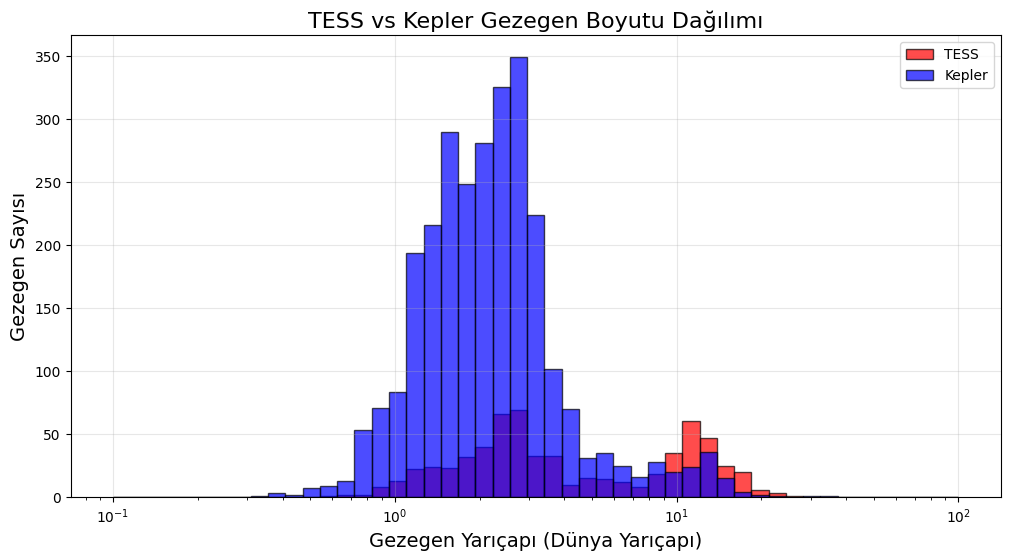

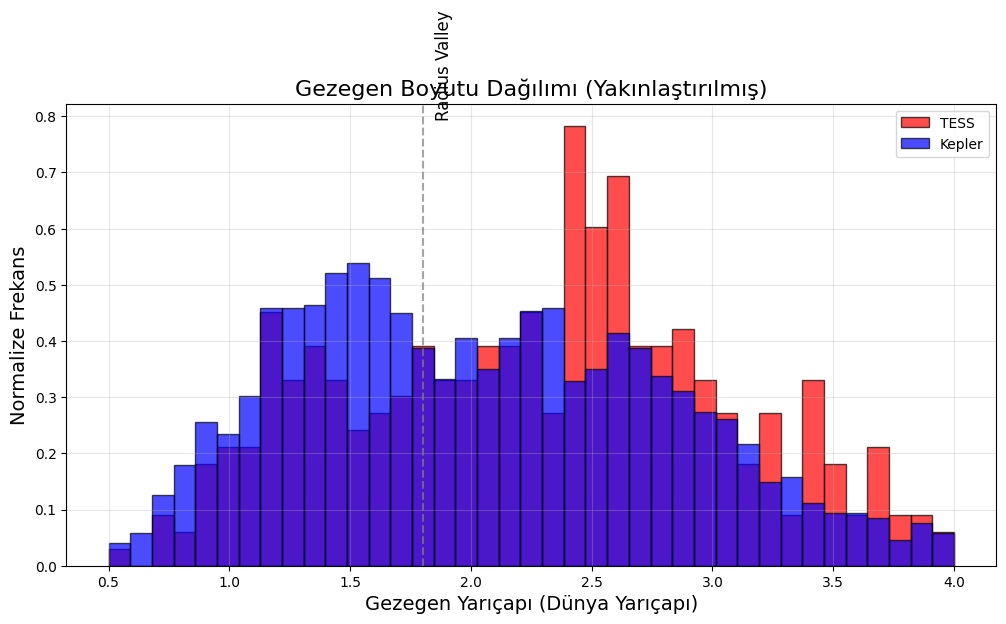

In [43]:
# create Boolean masks to filter the DataFrame for planets discovered by TESS and by Kepler
tess_mask = df['disc_facility'].str.contains('TESS', case=False, na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', case=False, na=False)

# filter the DataFrame using the masks
tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

# How many planets were discovered by TESS and Kepler?
# code here
# TESS ve Kepler gezegenlerini filtrele
tess_mask = df['disc_facility'].str.contains('TESS', na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', na=False)

tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

print(f"TESS tarafından keşfedilen gezegenler: {len(tess_planets)}")
print(f"Kepler tarafından keşfedilen gezegenler: {len(kepler_planets)}")

# Gelişmiş histogram
plt.figure(figsize=(12, 6))

bins = np.logspace(np.log10(0.1), np.log10(100), 50)

plt.hist(
    tess_planets['pl_rade'].dropna(),
    bins=bins,
    alpha=0.7,
    color='red',
    label='TESS',
    edgecolor='black'
)

plt.hist(
    kepler_planets['pl_rade'].dropna(),
    bins=bins,
    alpha=0.7,
    color='blue',
    label='Kepler',
    edgecolor='black'
)

plt.xscale('log')
plt.xlabel('Gezegen Yarıçapı (Dünya Yarıçapı)', fontsize=14)
plt.ylabel('Gezegen Sayısı', fontsize=14)
plt.title('TESS vs Kepler Gezegen Boyutu Dağılımı', fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Yakınlaştırılmış histogram (Radius Valley için)
plt.figure(figsize=(12, 6))
zoom_bins = np.linspace(0.5, 4, 40)

plt.hist(
    tess_planets['pl_rade'].dropna(),
    bins=zoom_bins,
    alpha=0.7,
    color='red',
    label='TESS',
    edgecolor='black',
    density=True
)

plt.hist(
    kepler_planets['pl_rade'].dropna(),
    bins=zoom_bins,
    alpha=0.7,
    color='blue',
    label='Kepler',
    edgecolor='black',
    density=True
)

plt.xlabel('Gezegen Yarıçapı (Dünya Yarıçapı)', fontsize=14)
plt.ylabel('Normalize Frekans', fontsize=14)
plt.title('Gezegen Boyutu Dağılımı (Yakınlaştırılmış)', fontsize=16)
plt.axvline(x=1.8, color='gray', linestyle='--', alpha=0.7)
plt.text(1.85, 0.8, 'Radius Valley', rotation=90, fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Let's compare the different planet populations discovered by Kepler and by TESS.

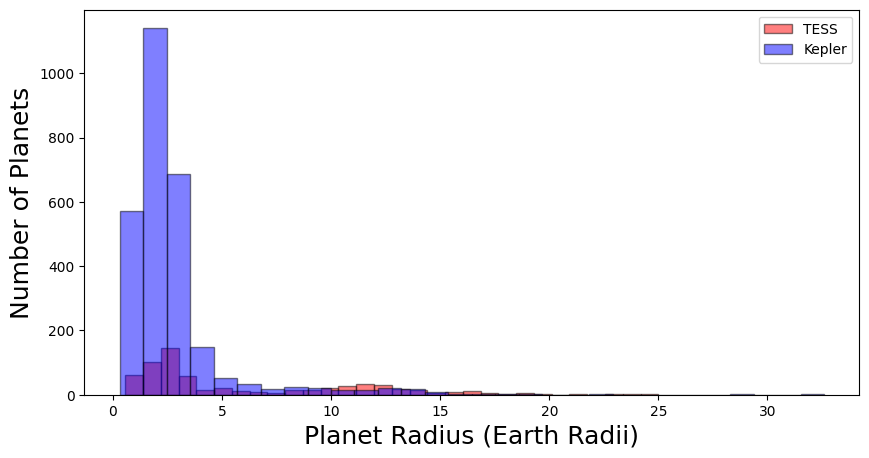

In [44]:
# create a histogram of planet radii for TESS and Kepler planets in Earth radii
plt.figure(figsize=(10, 5))

# plot the data
plt.hist(tess_planets['pl_rade'], bins=30, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=30, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

Let's improve this histogram to create a more informative visual comparison of the two distributions. We can assign common bins and set the axes to logarithmic scales, for example.

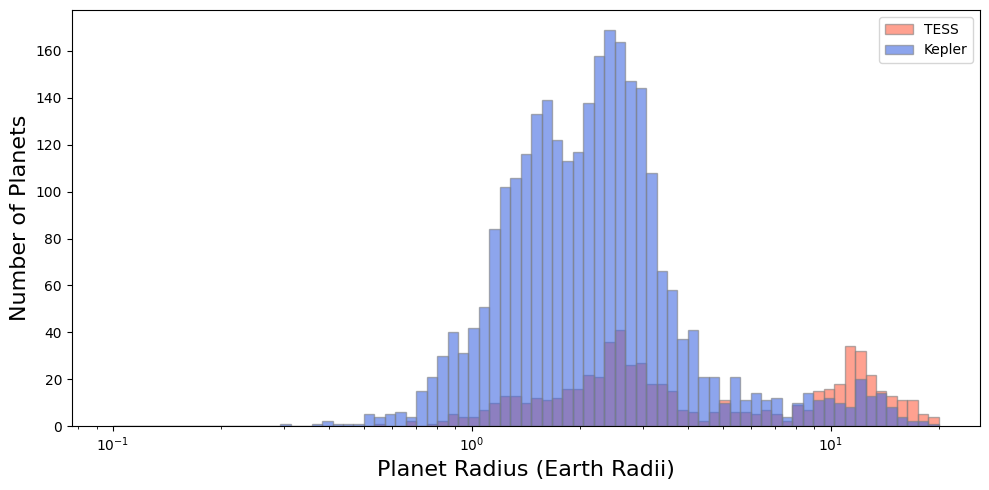

In [45]:
plt.figure(figsize=(10, 5))
# define informative bins for the histogram
bins = np.logspace(np.log10(0.1), np.log10(20), 80)

plt.hist(tess_planets['pl_rade'], bins=bins, alpha=0.6, label='TESS', color='tomato', edgecolor='gray')
plt.hist(kepler_planets['pl_rade'], bins=bins, alpha=0.6, label='Kepler', color='royalblue', edgecolor='gray')

plt.xscale('log')
plt.xlabel('Planet Radius (Earth Radii)', fontsize=16)
plt.ylabel('Number of Planets', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

What are the most notable differences between the two distributions? What are the similarities? Try re-plotting a 'zoomed-in' section of the above histogram to better view the 'radius valley'.

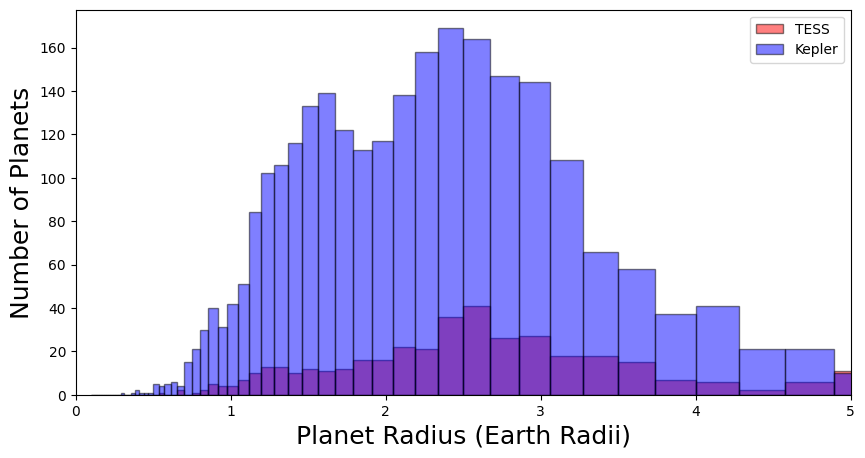

In [46]:
# code here
plt.figure(figsize=(10, 5))
plt.hist(tess_planets['pl_rade'], bins=bins, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=bins, alpha=0.5, label='Kepler', color='blue', edgecolor='black')
plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)
plt.legend()
plt.xlim(0,5)
plt.show()

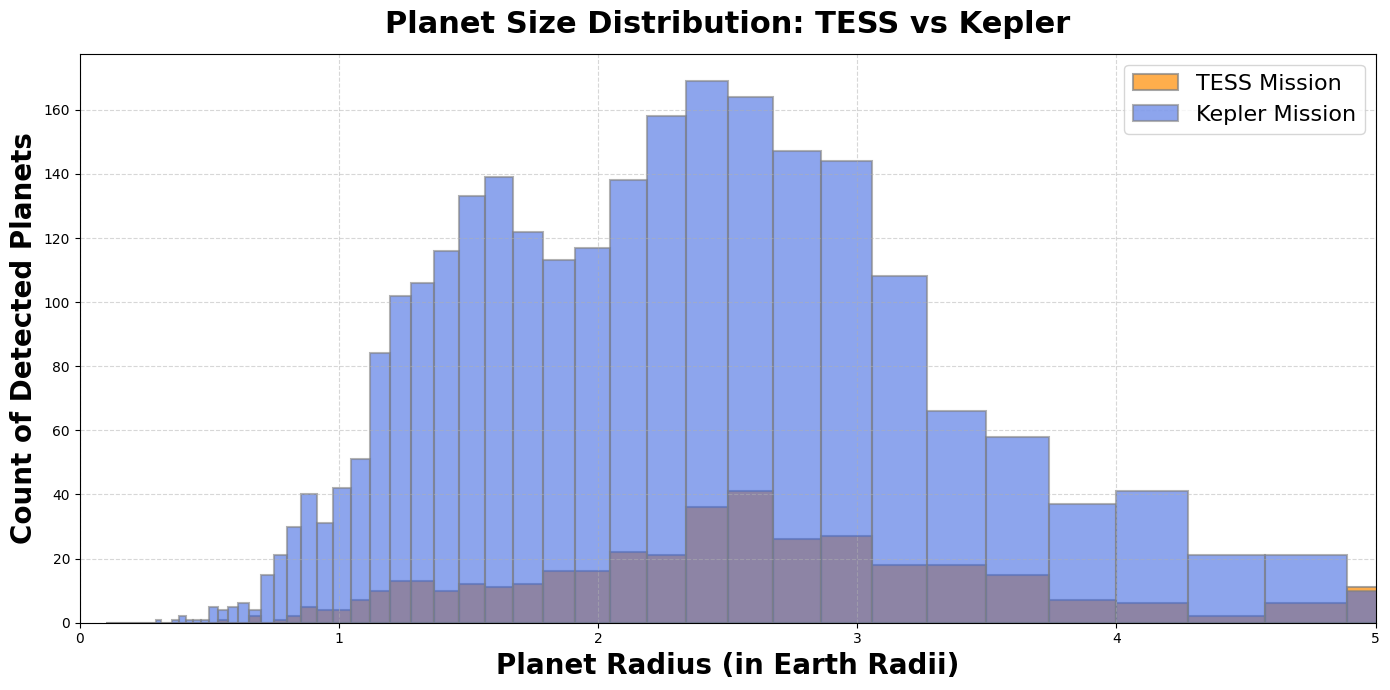

In [47]:
# code here
plt.figure(figsize=(14, 7))
plt.hist(tess_planets['pl_rade'], bins=bins, alpha=0.7,
         label='TESS Mission', color='#FF8C00', edgecolor='gray', linewidth=1.5)
plt.hist(kepler_planets['pl_rade'], bins=bins, alpha=0.6,
         label='Kepler Mission', color='#4169E1', edgecolor='gray', linewidth=1.5)

# Etiketler
plt.xlabel('Planet Radius (in Earth Radii)', fontsize=20, fontweight='bold')
plt.ylabel('Count of Detected Planets', fontsize=20, fontweight='bold')

# Başlık ve diğer stil ayarları
plt.title('Planet Size Distribution: TESS vs Kepler', fontsize=22, fontweight='bold', pad=15)
plt.legend(fontsize=16, loc='upper right')
plt.xlim(0, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Use different filters and functions on the data table to answer the following questions:
- How many planets were discovered using the Radial Velocity method?
- How far away is the furthest confirmed exoplanet? What is its name?
- How many planets are smaller than the Earth?

In [48]:
# create a mask for planets discovered by the Radial Velocity method
radialvelocity_number = len(df[df['discoverymethod'].str.contains('Radial Velocity', case=False, na=False)])
print(f'Number of planets discovered by Radial Velocity method: {radialvelocity_number}')

# find the furthest confirmed exoplanet
pl_distance=df.loc[df['sy_dist'].idxmax()]['sy_dist']
pl_name=df.loc[df['sy_dist'].idxmax()]['pl_name']
print(f'{pl_name} at {pl_distance} parsecs distance is the farthest planet.')

# count the number of planets smaller than Earth
n_earthsmall=len(df[df['pl_rade']<1])
print(f'There are {n_earthsmall} planets with radius smaller than that of the Earth.')

Number of planets discovered by Radial Velocity method: 1128
SWEEPS-11 b at 8500.0 parsecs distance is the farthest planet.
There are 224 planets with radius smaller than that of the Earth.


Now that we've had some practice, try out the following exercise. Select only planets that have mass measurements using the same Boolean mask method we did earlier. Then, select a subset of the planets with mass mesurements that also have planet radius measurements (i.e., planet radius and mass columns are not empty/NaN).

In [50]:
# create a mask for planets with mass measurements
mass_mask = df['pl_bmasse'].notna()
selected_planets = df[mass_mask]

# create a mask for planets that also have planet radius measurements (i.e., planet radius column is not empty/NaN!)
radius_mask = selected_planets.notna()
selected_planets2 = selected_planets[radius_mask]

# how many planets were discovered by the Radial Velocity method?
radialvelocity_number1 = len(selected_planets[selected_planets['discoverymethod'].str.contains('Radial Velocity', case=False, na=False)])
print(f'Number of such planets discovered by Radial Velocity method: {radialvelocity_number1}')

# how many of those have planet radius measurements?
radialvelocity_number2 = len(selected_planets2[selected_planets2['discoverymethod'].str.contains('Radial Velocity', case=False, na=False)])
print(f'Number of such planets discovered by Radial Velocity method: {radialvelocity_number2}')


Number of such planets discovered by Radial Velocity method: 1127
Number of such planets discovered by Radial Velocity method: 1127


Now that we have our filtered data, let's make a plot that informs us about this subset of planets. Make a Planet Density (g/cm^3) vs. Planet Radius (Earth Radius) plot. The unit conversions have been coded for you using the astropy package.

In [51]:
import astropy.units as u

# convert planet radius from Earth radii to centimeters
rad_cm = selected_planets['pl_rade'] * u.R_earth.to(u.cm)

# convert planet mass from Earth masses to g
mass_g = selected_planets['pl_bmasse'] * u.M_earth.to(u.g)

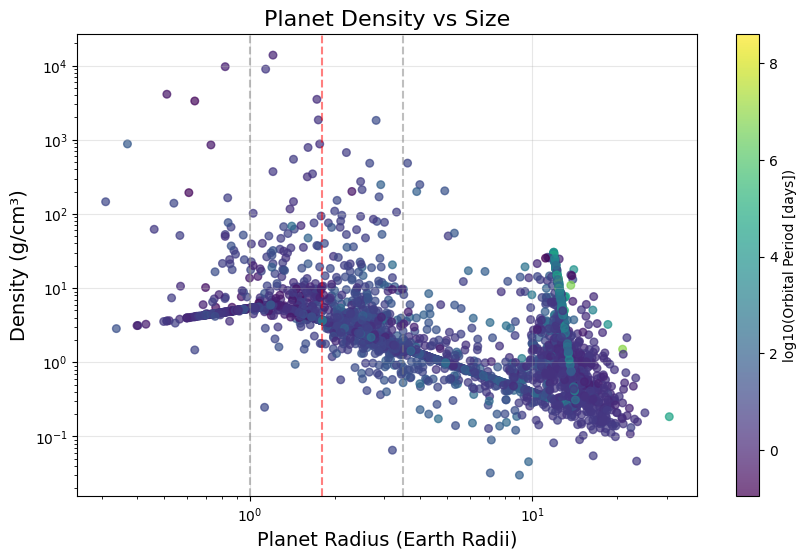

In [52]:
# Planets with mass AND radius measurements
mass_mask = df['pl_bmasse'].notna()
radius_mask = df['pl_rade'].notna()
selected_planets = df[mass_mask & radius_mask]

# Calculate density
rad_cm = selected_planets['pl_rade'] * u.R_earth.to(u.cm)
mass_g = selected_planets['pl_bmasse'] * u.M_earth.to(u.g)
volume = 4/3 * np.pi * (rad_cm)**3
density = mass_g / volume

# Density vs radius plot
plt.figure(figsize=(10, 6))
plt.scatter(selected_planets['pl_rade'], density,
            c=np.log10(selected_planets['pl_orbper']),
            cmap='viridis', alpha=0.7, s=30)

plt.colorbar(label='log10(Orbital Period [days])')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Planet Radius (Earth Radii)', fontsize=14)
plt.ylabel('Density (g/cm³)', fontsize=14)
plt.title('Planet Density vs Size', fontsize=16)
plt.grid(alpha=0.3)

# Add reference lines
plt.axvline(1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(1.8, color='red', linestyle='--', alpha=0.5)
plt.axvline(3.5, color='gray', linestyle='--', alpha=0.5)

plt.show()

### Part 4: Choose your own adventure

Using the various things you've learned throughout this tutorial and assignment, create a plot to visualize the correlation between any parameters of your choosing. Choose a specific and interesting subset of planets (e.g., planets discovered via the radial velocity method, nearby planets, etc.). Write down some interesting things you learned from your plot.

In [41]:
# code here

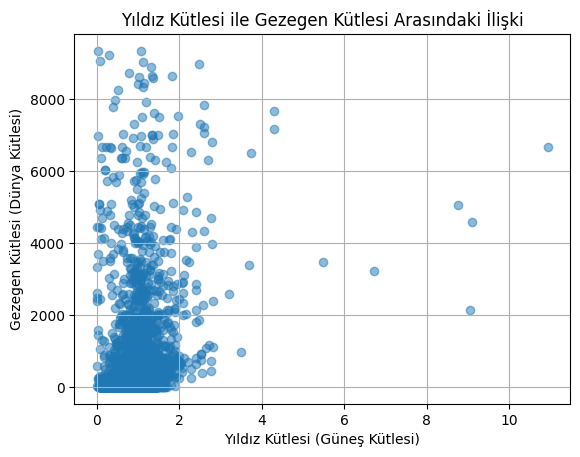

In [53]:
import matplotlib.pyplot as plt

# Veride eksik olmayan değerleri alalım
df_mass = df[['pl_bmasse', 'st_mass']].dropna()

# Grafik çizimi
plt.scatter(df_mass['st_mass'], df_mass['pl_bmasse'], alpha=0.5)
plt.xlabel("Yıldız Kütlesi (Güneş Kütlesi)")
plt.ylabel("Gezegen Kütlesi (Dünya Kütlesi)")
plt.title("Yıldız Kütlesi ile Gezegen Kütlesi Arasındaki İlişki")
plt.grid(True)
plt.show()


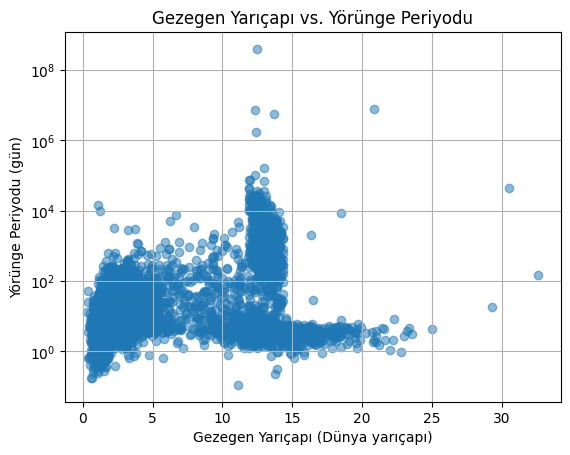

In [54]:
# Gerekli sütunları al, eksik olanları çıkar
df_orbit = df[['pl_rade', 'pl_orbper']].dropna()

plt.scatter(df_orbit['pl_rade'], df_orbit['pl_orbper'], alpha=0.5)
plt.xlabel("Gezegen Yarıçapı (Dünya yarıçapı)")
plt.ylabel("Yörünge Periyodu (gün)")
plt.title("Gezegen Yarıçapı vs. Yörünge Periyodu")
plt.yscale("log")  # periyotlar çok geniş aralıkta olduğu için log ölçek
plt.grid(True)
plt.show()


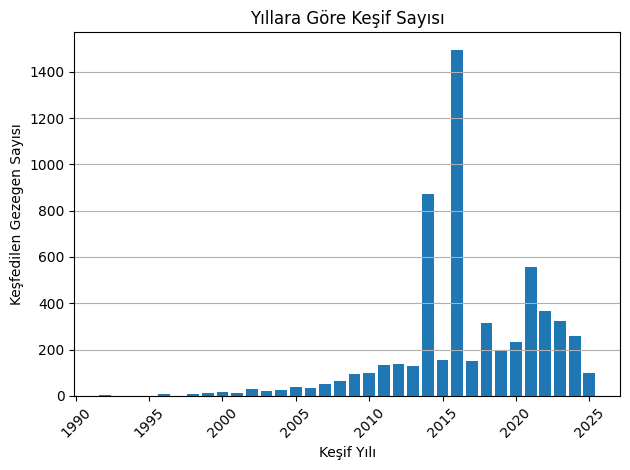

In [55]:
# Geçerli keşif yıllarını filtrele
df_year = df['disc_year'].dropna().astype(int)

# Sayıları hesapla
discovery_counts = df_year.value_counts().sort_index()

# Bar grafiği
plt.bar(discovery_counts.index, discovery_counts.values)
plt.xlabel("Keşif Yılı")
plt.ylabel("Keşfedilen Gezegen Sayısı")
plt.title("Yıllara Göre Keşif Sayısı")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-56-3843530136.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x='discoverymethod', y='pl_bmasse', palette="Set2")


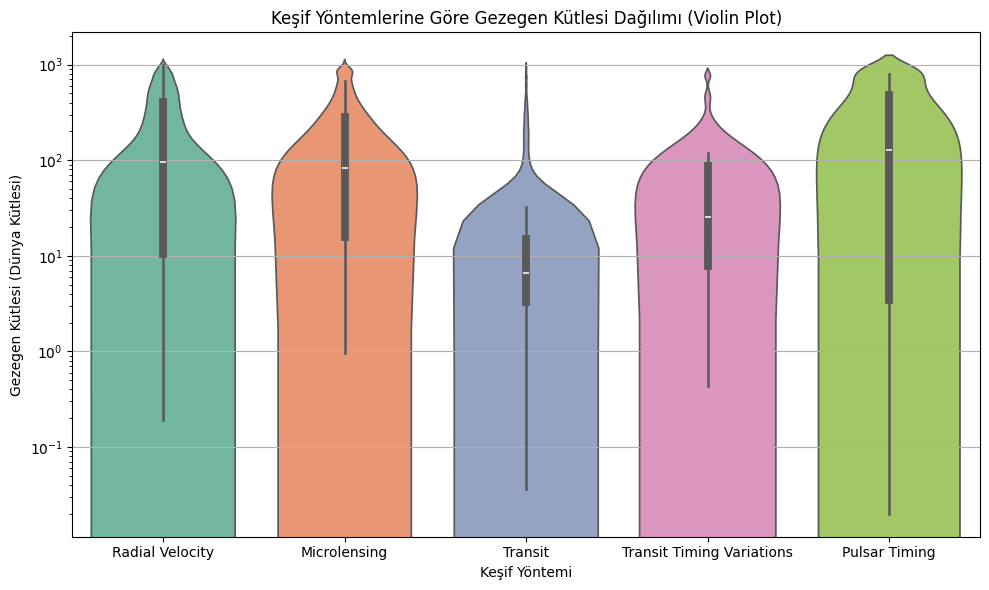

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerekli verileri filtrele
df_violin = df[['discoverymethod', 'pl_bmasse']].dropna()
df_violin = df_violin[df_violin['pl_bmasse'] < 1000]  # uç değerleri çıkar

# İlk 5 keşif yöntemini al
top_methods = df_violin['discoverymethod'].value_counts().head(5).index
df_violin = df_violin[df_violin['discoverymethod'].isin(top_methods)]

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_violin, x='discoverymethod', y='pl_bmasse', palette="Set2")
plt.yscale("log")
plt.ylabel("Gezegen Kütlesi (Dünya Kütlesi)")
plt.xlabel("Keşif Yöntemi")
plt.title("Keşif Yöntemlerine Göre Gezegen Kütlesi Dağılımı (Violin Plot)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


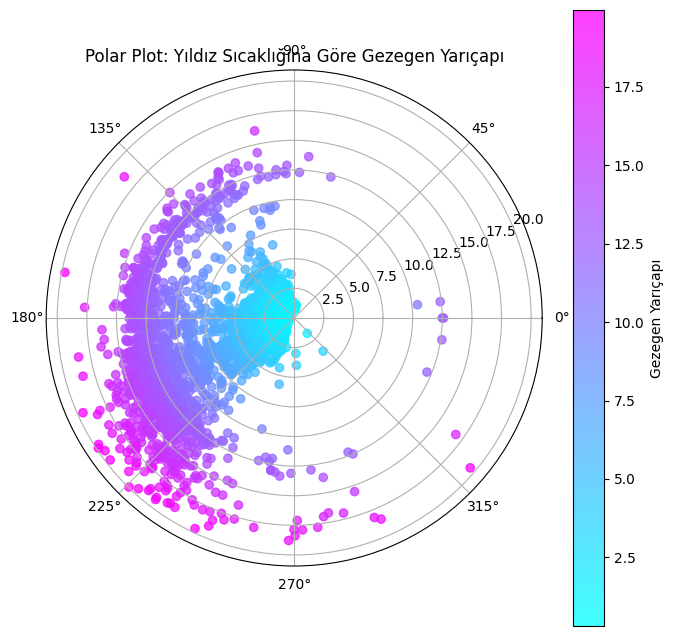

In [57]:
import numpy as np

# Veri seçimi ve temizleme
df_polar = df[['st_teff', 'pl_rade']].dropna()
df_polar = df_polar[df_polar['pl_rade'] < 20]
df_polar = df_polar[df_polar['st_teff'] < 10000]

# Polar grafiğe hazırlık
r = df_polar['pl_rade']
theta = 2 * np.pi * (df_polar['st_teff'] - df_polar['st_teff'].min()) / (df_polar['st_teff'].max() - df_polar['st_teff'].min())

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
c = ax.scatter(theta, r, c=r, cmap='cool', alpha=0.75)
plt.title("Polar Plot: Yıldız Sıcaklığına Göre Gezegen Yarıçapı")
plt.colorbar(c, label="Gezegen Yarıçapı")
plt.show()


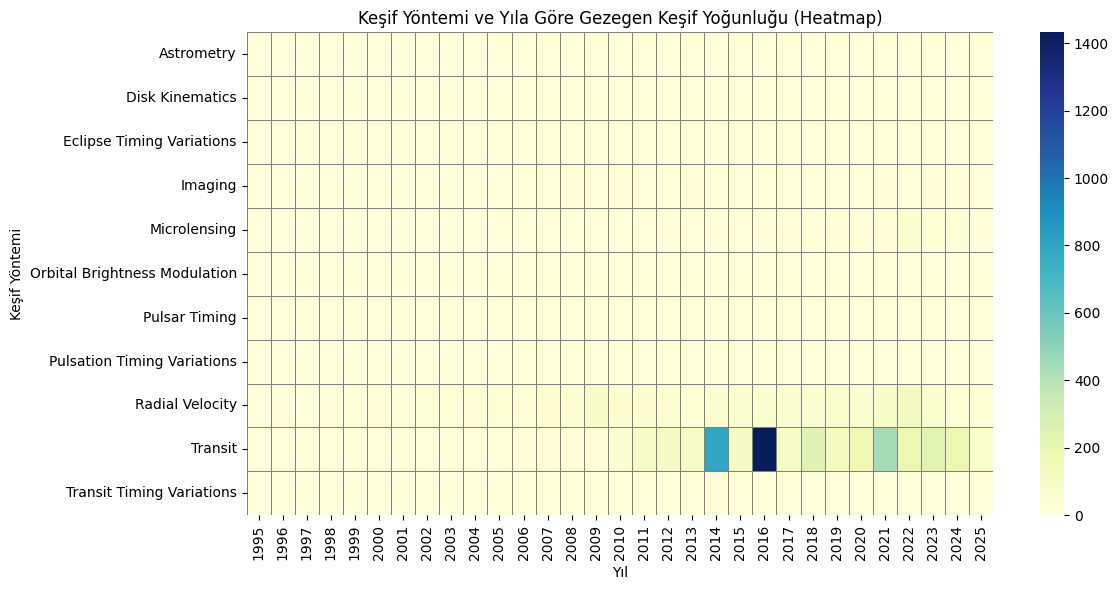

In [58]:
# Veri hazırlığı
df_heat = df[['disc_year', 'discoverymethod']].dropna()
df_heat = df_heat[df_heat['disc_year'] >= 1995]
df_heat['disc_year'] = df_heat['disc_year'].astype(int)

# Pivot tablo
heat_data = df_heat.pivot_table(index='discoverymethod', columns='disc_year', aggfunc='size', fill_value=0)

# Heatmap çizimi
plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Keşif Yöntemi ve Yıla Göre Gezegen Keşif Yoğunluğu (Heatmap)")
plt.xlabel("Yıl")
plt.ylabel("Keşif Yöntemi")
plt.tight_layout()
plt.show()
